# 1. Set up

In [254]:
## Import library
import os
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

warnings.filterwarnings('ignore')

## Set working directory
os.chdir('/Users/yeonju/Desktop/로켓펀치/ham-spam')


In [312]:
## Import data
train = pd.read_csv('data.csv')
test = pd.read_csv('test.csv')
o_test = pd.read_csv('o_test.csv')

train.head()


,blog,can_military_service,cover,employee_count,exit_type,facebook,found_date,github,googleplus,instagram,...,num_nan,description_spam,description_ham,homepage_n,name_spam,name_ham,overview_n,overview_spam,overview_ham,pm_binary
0,0,0,0,0,0,0,1,0,0,0,...,16,1,5,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,18,0,0,0,0,3,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,18,0,5,0,0,2,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,19,0,0,0,0,2,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,19,0,0,0,0,2,0,0,0,0


In [313]:
## One-hot encoding can_military_service variable
one_hot = pd.get_dummies(train.can_military_service)
one_hot.columns = ['can_military_service_0', 'can_military_service_1', 'can_military_service_2']

train = train.drop('can_military_service', axis = 1)
train = train.join(one_hot)

one_hot = pd.get_dummies(test.can_military_service)
one_hot.columns = ['can_military_service_0', 'can_military_service_1', 'can_military_service_2']

test = test.drop('can_military_service', axis = 1)
test = test.join(one_hot)

one_hot = pd.get_dummies(o_test.can_military_service)
one_hot.columns = ['can_military_service_0', 'can_military_service_1', 'can_military_service_2']

o_test = o_test.drop('can_military_service', axis = 1)
o_test = o_test.join(one_hot)


In [314]:
## Divide test into validation, and test
zero = test[test['spam'] == 0]
one = test[test['spam'] == 1]

np.random.seed(1)
zero = zero.sample(frac = 1)
one = one.sample(frac = 1)

valid = pd.concat([zero.iloc[:round(np.shape(zero)[0] * 0.5), :], one.iloc[:round(np.shape(one)[0] * 0.5), :]])
test = pd.concat([zero.iloc[round(np.shape(zero)[0] * 0.5) : , :], one.iloc[round(np.shape(one)[0] * 0.5) : , :]])

np.random.seed(1)
valid = valid.sample(frac = 1)
test = test.sample(frac = 1)

print(np.shape(train))
print(np.shape(valid))
print(np.shape(test))

(41799, 31)
(13934, 31)
(13933, 31)


In [315]:
## Standardize variable
# view_count
train.view_count = (train.view_count - min(train.view_count)) / (max(train.view_count) - min(train.view_count))
valid.view_count = (valid.view_count - min(valid.view_count)) / (max(valid.view_count) - min(valid.view_count))
test.view_count = (test.view_count - min(test.view_count)) / (max(test.view_count) - min(test.view_count))
o_test.view_count = (o_test.view_count - min(o_test.view_count)) / (max(o_test.view_count) - min(test.view_count))

# description_spam, description_ham
train.description_spam = (train.description_spam - min(train.description_spam)) / (max(train.description_spam) - min(train.description_spam))
valid.description_spam = (valid.description_spam - min(valid.description_spam)) / (max(valid.description_spam) - min(valid.description_spam))
test.description_spam = (test.description_spam - min(test.description_spam)) / (max(test.description_spam) - min(test.description_spam))

train.description_ham = (train.description_ham - min(train.description_ham)) / (max(train.description_ham) - min(train.description_ham))
valid.description_ham = (valid.description_ham - min(valid.description_ham)) / (max(valid.description_ham) - min(valid.description_ham))
test.description_ham = (test.description_ham - min(test.description_ham)) / (max(test.description_ham) - min(test.description_ham))

# name_spam, name_ham
train.name_spam = (train.name_spam - min(train.name_spam)) / (max(train.name_spam) - min(train.name_spam))
valid.name_spam = (valid.name_spam - min(valid.name_spam)) / (max(valid.name_spam) - min(valid.name_spam))
test.name_spam = (test.name_spam - min(test.name_spam)) / (max(test.name_spam) - min(test.name_spam))

train.name_ham = (train.name_ham - min(train.name_ham)) / (max(train.name_ham) - min(train.name_ham))
valid.name_ham = (valid.name_ham - min(valid.name_ham)) / (max(valid.name_ham) - min(valid.name_ham))
test.name_ham = (test.name_ham - min(test.name_ham)) / (max(test.name_ham) - min(test.name_ham))

# overview_spam, overview_ham, overview_n
train.overview_spam = (train.overview_spam - min(train.overview_spam)) / (max(train.overview_spam) - min(train.overview_spam))
valid.overview_spam = (valid.overview_spam - min(valid.overview_spam)) / (max(valid.overview_spam) - min(valid.overview_spam))
test.overview_spam = (test.overview_spam - min(test.overview_spam)) / (max(test.overview_spam) - min(test.overview_spam))

train.overview_ham = (train.overview_ham - min(train.overview_ham)) / (max(train.overview_ham) - min(train.overview_ham))
valid.overview_ham = (valid.overview_ham - min(valid.overview_ham)) / (max(valid.overview_ham) - min(valid.overview_ham))
test.overview_ham = (test.overview_ham - min(test.overview_ham)) / (max(test.overview_ham) - min(test.overview_ham))

train.overview_n = (train.overview_n - min(train.overview_n)) / (max(train.overview_n) - min(train.overview_n))
valid.overview_n = (valid.overview_n - min(valid.overview_n)) / (max(valid.overview_n) - min(valid.overview_n))
test.overview_n = (test.overview_n - min(test.overview_n)) / (max(test.overview_n) - min(test.overview_n))

# num_nan
train.num_nan = (train.num_nan - min(train.num_nan)) / (max(train.num_nan) - min(train.num_nan))
valid.num_nan = (valid.num_nan - min(valid.num_nan)) / (max(valid.num_nan) - min(valid.num_nan))
test.num_nan = (test.num_nan - min(test.num_nan)) / (max(test.num_nan) - min(test.num_nan))
o_test.num_nan = (o_test.num_nan - min(o_test.num_nan)) / (max(o_test.num_nan) - min(o_test.num_nan))

# homepage_n
train.homepage_n = (train.homepage_n - min(train.homepage_n)) / (max(train.homepage_n) - min(train.homepage_n))
valid.homepage_n = (valid.homepage_n - min(valid.homepage_n)) / (max(valid.homepage_n) - min(valid.homepage_n))
test.homepage_n = (test.homepage_n - min(test.homepage_n)) / (max(test.homepage_n) - min(test.homepage_n))


In [316]:
# Define x and y
X_train = train.drop(columns = ['spam'])
y_train = train.spam

X_valid = valid.drop(columns = ['spam'])
y_valid = valid.spam

X_test = test.drop(columns = ['spam'])
y_test = test.spam


# 2. Model fitting

## Random forest

1. Hyperparameter tuning이 쉬움
2. Computing time이 짧음
3. Able to perform as well as more complex model

### 1) n_estimators : number of tree

In [317]:
n_estimators_range = [25, 50, 100, 200, 400, 800, 1600]
# decreasing n_estimators may result in overfitting

train_score = []
valid_score = []

for n_estimators_val in n_estimators_range :
    rf = RandomForestClassifier(random_state = 1,
                                n_estimators = n_estimators_val)

    rf = rf.fit(X_train, y_train)
    rf_pred = rf.predict(X_train)
    tab = confusion_matrix(y_train, rf_pred)
    
    rec = tab[1,1] / (tab[1,1] + tab[1,0])
    pre = tab[1,1] / (tab[1,1] + tab[0,1])
    f1 = (2 * rec * pre) / (rec + pre)
    
    train_score.append(f1) 
    
    rf_pred = rf.predict(X_valid)
    tab = confusion_matrix(y_valid, rf_pred)
    
    rec = tab[1,1] / (tab[1,1] + tab[1,0])
    pre = tab[1,1] / (tab[1,1] + tab[0,1])
    f1 = (2 * rec * pre) / (rec + pre)
    
    valid_score.append(f1) 


Train score :  [0.8053, 0.8095, 0.8127, 0.8107, 0.8107, 0.8107, 0.8107]
Valid score :  [0.184, 0.2095, 0.2074, 0.2207, 0.2145, 0.2183, 0.2199]


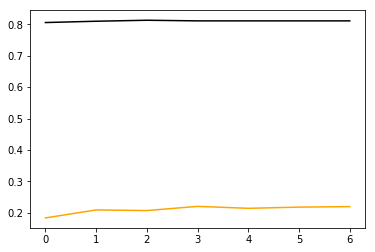

In [318]:
print('Train score : ', [round(x, 4) for x in train_score])
print('Valid score : ', [round(x, 4) for x in valid_score])

plt.plot(train_score, color = 'black')
plt.plot(valid_score, color = 'orange')

plt.show()


### 2) min_samples_leaf : minimum number of samples required to be at a leaf node

In [319]:
min_samples_leaf_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
# decreasing min_samples_leaf may result in overfitting

train_score = []
valid_score = []
for min_samples_leaf_val in min_samples_leaf_range :

    rf = RandomForestClassifier(random_state = 1,
                                n_estimators = 200,
                                min_samples_leaf = min_samples_leaf_val)

    rf = rf.fit(X_train, y_train)
    rf_pred = rf.predict(X_train)
    tab = confusion_matrix(y_train, rf_pred)
    
    rec = tab[1,1] / (tab[1,1] + tab[1,0])
    pre = tab[1,1] / (tab[1,1] + tab[0,1])
    f1 = (2 * rec * pre) / (rec + pre)
    
    train_score.append(f1) 
    
    rf_pred = rf.predict(X_valid)
    tab = confusion_matrix(y_valid, rf_pred)
    
    rec = tab[1,1] / (tab[1,1] + tab[1,0])
    pre = tab[1,1] / (tab[1,1] + tab[0,1])
    f1 = (2 * rec * pre) / (rec + pre)
    
    valid_score.append(f1) 


Train score :  [0.8107, 0.6331, 0.5723, 0.5287, 0.508, 0.4821, 0.4718, 0.4564, 0.46, 0.4377]
Valid score :  [0.2207, 0.3313, 0.3624, 0.3889, 0.3688, 0.3824, 0.3333, 0.3385, 0.3115, 0.2927]


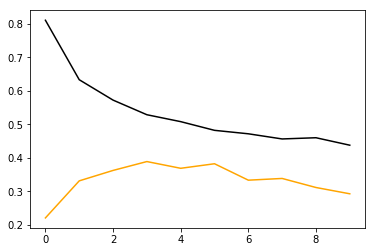

In [320]:
print('Train score : ', [round(x, 4) for x in train_score])
print('Valid score : ', [round(x, 4) for x in valid_score])

plt.plot(train_score, color = 'black')
plt.plot(valid_score, color = 'orange')

plt.show()


### 3) max_depth : maximum depth of the tree

In [323]:
max_depth_range = [20, 25, 30, 35, 40, 45, 50] 
# increasing max_depth may result in overfitting

train_score = []
valid_score = []
for max_depth_val in max_depth_range :
    rf = RandomForestClassifier(random_state = 1,
                                n_estimators = 200,
                                min_samples_leaf = 4,
                                max_depth = max_depth_val)

    rf = rf.fit(X_train, y_train)
    rf_pred = rf.predict(X_train)
    tab = confusion_matrix(y_train, rf_pred)
    
    rec = tab[1,1] / (tab[1,1] + tab[1,0])
    pre = tab[1,1] / (tab[1,1] + tab[0,1])
    f1 = (2 * rec * pre) / (rec + pre)
    
    train_score.append(f1) 
    
    rf_pred = rf.predict(X_valid)
    tab = confusion_matrix(y_valid, rf_pred)
    
    rec = tab[1,1] / (tab[1,1] + tab[1,0])
    pre = tab[1,1] / (tab[1,1] + tab[0,1])
    f1 = (2 * rec * pre) / (rec + pre)
    
    valid_score.append(f1) 


Train score :  [0.5209, 0.5287, 0.5287, 0.5209, 0.5287, 0.5287, 0.5287]
Valid score :  [0.3714, 0.3836, 0.381, 0.3776, 0.3889, 0.3889, 0.3889]


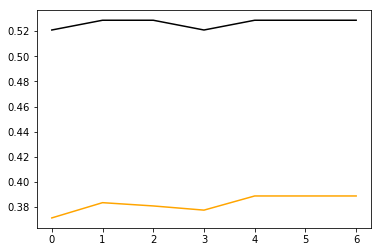

In [324]:
print('Train score : ', [round(x, 4) for x in train_score])
print('Valid score : ', [round(x, 4) for x in valid_score])

plt.plot(train_score, color = 'black')
plt.plot(valid_score, color = 'orange')

plt.show()


### 4) max_features : number of features to consider for each split

In [327]:
max_features_range = [1, 5, 10, 15, 20] 
# increasing max_features may result in overfitting

train_score = []
valid_score = []
for max_features_val in max_features_range :
    rf = RandomForestClassifier(random_state = 1,
                                n_estimators = 200,
                                min_samples_leaf = 4,
                                max_depth = 40,
                                max_features = max_features_val)

    rf = rf.fit(X_train, y_train)
    
    rf_pred = rf.predict(X_train)
    tab = confusion_matrix(y_train, rf_pred)
    
    rec = tab[1,1] / (tab[1,1] + tab[1,0])
    pre = tab[1,1] / (tab[1,1] + tab[0,1])
    f1 = (2 * rec * pre) / (rec + pre)
    
    train_score.append(f1) 
    
    rf_pred = rf.predict(X_valid)
    tab = confusion_matrix(y_valid, rf_pred)
    
    rec = tab[1,1] / (tab[1,1] + tab[1,0])
    pre = tab[1,1] / (tab[1,1] + tab[0,1])
    f1 = (2 * rec * pre) / (rec + pre)
    
    valid_score.append(f1) 


Train score :  [nan, 0.5287, 0.5854, 0.5928, 0.6279]
Valid score :  [nan, 0.3889, 0.3392, 0.301, 0.2113]


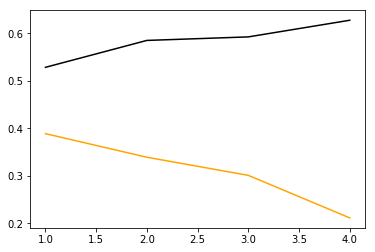

In [328]:
print('Train score : ', [round(x, 4) for x in train_score])
print('Valid score : ', [round(x, 4) for x in valid_score])

plt.plot(train_score, color = 'black')
plt.plot(valid_score, color = 'orange')

plt.show()


### 5) 10-folds cross validation

In [329]:
rf = RandomForestClassifier(random_state = 1)

n_estimators_range = [100, 200] 
min_samples_leaf_range = [3, 4, 5]
max_depth_range = [35, 40, 45] 
max_features_range = [4, 5, 6]

param_grid = [{'n_estimators' : n_estimators_range,
              'max_depth' : max_depth_range,
              'min_samples_leaf' : min_samples_leaf_range,
              'max_features' : max_features_range}]

gs = GridSearchCV(estimator = rf,
                  param_grid = param_grid,
                  cv = 10,
                  scoring = 'f1')

gs = gs.fit(X_train, y_train)
rf = gs.best_estimator_
print(rf)

rf_pred = rf.predict(X_test)
confusion_matrix(y_test, rf_pred)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=35, max_features=6, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=3,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=1,
            verbose=0, warm_start=False)


array([[13325,   534],
       [   40,    34]])

# 3. 추가 분석

## 1) Under sampling

In [384]:
under_range = [0.2, 0.4, 0.6, 0.8, 1]

train_score = []
valid_score = []
for under_val in under_range :
    zero = train[train['spam'] == 0]
    one = train[train['spam'] == 1]

    np.random.seed(1)
    zero = zero.iloc[np.random.choice(np.shape(zero)[0], round(np.shape(zero)[0] * under_val)), :]

    train_under_samp = pd.concat([one, zero])

    X_train_under_samp = train_under_samp.drop(columns = ['spam'])
    y_train_under_samp = train_under_samp.spam

    rf = RandomForestClassifier(random_state = 1,
                                n_estimators = 100,
                                min_samples_leaf = 3,
                                max_depth = 35,
                                max_features = 6)
    rf = rf.fit(X_train_under_samp, y_train_under_samp)
    rf_pred = rf.predict(X_train_under_samp)
    
    tab = confusion_matrix(y_train_under_samp, rf_pred)
    
    rec = tab[1,1] / (tab[1,1] + tab[1,0])
    pre = tab[1,1] / (tab[1,1] + tab[0,1])
    f1 = (2 * rec * pre) / (rec + pre)
    
    train_score.append(f1) 
    
    rf_pred = rf.predict(X_valid)
    tab = confusion_matrix(y_valid, rf_pred)
    
    rec = tab[1,1] / (tab[1,1] + tab[1,0])
    pre = tab[1,1] / (tab[1,1] + tab[0,1])
    f1 = (2 * rec * pre) / (rec + pre)
    
    valid_score.append(f1) 


Train score :  [0.6994, 0.6344, 0.6092, 0.5915, 0.575]
Valid score :  [0.093, 0.2271, 0.299, 0.3187, 0.3171]


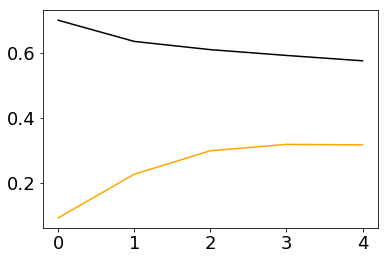

In [385]:
print('Train score : ', [round(x, 4) for x in train_score])
print('Valid score : ', [round(x, 4) for x in valid_score])

plt.plot(train_score, color = 'black')
plt.plot(valid_score, color = 'orange')

plt.show()


In [386]:
np.random.seed(1)
zero = zero.iloc[np.random.choice(np.shape(zero)[0], round(np.shape(zero)[0] * 0.8)), :]

train_under_samp = pd.concat([one, zero])

X_train_under_samp = train_under_samp.drop(columns = ['spam'])
y_train_under_samp = train_under_samp.spam

rf = RandomForestClassifier(random_state = 1,
                                n_estimators = 100,
                                min_samples_leaf = 3,
                                max_depth = 35,
                                max_features = 6)
rf = rf.fit(X_train_under_samp, y_train_under_samp)
rf_pred = rf.predict(X_test)
    
confusion_matrix(y_test, rf_pred)


array([[13227,   632],
       [   40,    34]])

sampling하여도 computing time이 크게 줄어들지 않고 오히려 f1이 낮아지기 때문에 전체 데이터를 사용하는 것이 더 나아보임

## 2) Importance plot

In [353]:
rf = RandomForestClassifier(random_state = 1,
                            n_estimators = 100,
                            min_samples_leaf = 3,
                            max_depth = 35,
                            max_features = 6)
rf = rf.fit(X_train, y_train)

importance = pd.Series([round(x, 4) for x in rf.feature_importances_], index = X_train.columns)
importance

blog                      0.0005
cover                     0.0030
employee_count            0.0008
exit_type                 0.0080
facebook                  0.0024
found_date                0.0060
github                    0.0000
googleplus                0.0000
instagram                 0.0027
kakao_story               0.0000
logo                      0.0115
phone                     0.0048
pinterest                 0.0000
twitter                   0.0001
view_count                0.1350
yellow_id                 0.0000
youtube                   0.0000
num_nan                   0.0267
description_spam          0.0741
description_ham           0.0367
homepage_n                0.0100
name_spam                 0.3952
name_ham                  0.0555
overview_n                0.0116
overview_spam             0.0159
overview_ham              0.0091
pm_binary                 0.1904
can_military_service_0    0.0000
can_military_service_1    0.0000
can_military_service_2    0.0000
dtype: flo

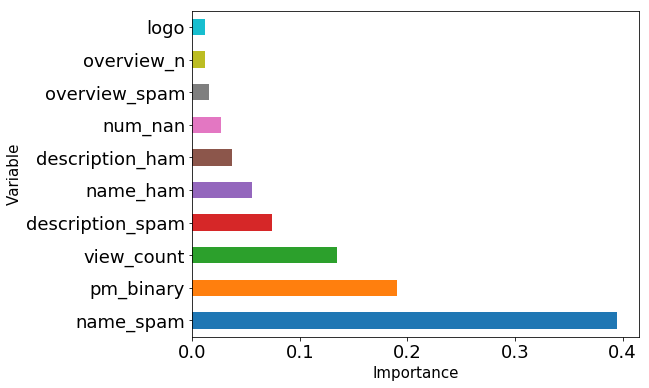

In [362]:
plt.figure(figsize=(8,6))

importance.nlargest(10).plot(kind = 'barh')
plt.xlabel('Importance')
plt.ylabel('Variable')

plt.rc('font', size = 15)

plt.show()

## 3) Fitting random forest again

In [363]:
rf_b = RandomForestClassifier(random_state = 1,
                            n_estimators = 100,
                            min_samples_leaf = 3,
                            max_depth = 35,
                            max_features = 6)
rf_b = rf_b.fit(X_train, y_train)

rf_pred = rf_b.predict(X_train)

one_idx = train[rf_pred == 1].index.tolist() 
X_train_one = X_train.loc[one_idx, :]
y_train_one = y_train[one_idx]

rf = RandomForestClassifier(random_state = 1)

param_grid = [{'n_estimators' : [50, 100],
              'max_depth' : [20, 30, 40],
              'min_samples_leaf' : [1, 3, 5, 7],
              'max_features' : [5, 10, 15, 20]}]
gscv = GridSearchCV(estimator = rf,
                  param_grid = param_grid,
                  cv = 10,
                  scoring = 'recall')

gs = gscv.fit(X_train_one, y_train_one)
rf_one = gs.best_estimator_

zero_idx = train[rf_pred == 0].index.tolist() 
X_train_zero = X_train.loc[zero_idx, :]
y_train_zero = y_train[zero_idx]

gs = gscv.fit(X_train_zero, y_train_zero)
rf_zero = gs.best_estimator_


In [391]:
rf_pred = rf_b.predict(X_test)

one_idx = test[rf_pred == 1].index.tolist() # spam이라고 예측한 test의 index
X_test_one = X_test.loc[one_idx, :]
y_test_one = y_test[one_idx]

one_pred = rf_one.predict(X_test_one)

confusion_matrix(y_test_one, one_pred)


array([[  0, 534],
       [  0,  34]])

In [390]:
zero_idx = test[rf_pred == 0].index.tolist() # spam이라고 예측한 test의 index
X_test_zero = X_test.loc[zero_idx, :]
y_test_zero = y_test[zero_idx]

zero_pred = rf_zero.predict(X_test_zero)

confusion_matrix(y_test_zero, zero_pred)


array([[13288,    37],
       [   38,     2]])

In [378]:
test['f_pred'] = 0

test.f_pred[one_idx] = one_pred
test.f_pred[zero_idx] = zero_pred

In [379]:
confusion_matrix(y_test, test.f_pred)

array([[13288,   571],
       [   38,    36]])

recall은 높아졌지만 precision이 낮아짐

# 4. Save result

test 데이터에서 스팸인데 스팸이 아니라고 분류한 데이터

In [380]:
w_idx = test[np.logical_and(rf_b.predict(X_test) == 0, y_test == 1)].index.tolist()
spam_no_spam = o_test.iloc[w_idx, :]
print(spam_no_spam.head())

spam_no_spam.to_csv('spam_no_spam.csv', encoding = 'utf-8', index = False)


      blog                                      cover  \
21000  NaN                                        NaN   
14285  NaN  company/17308/na-108_cover_1462369293.jpg   
23899  NaN                                        NaN   
1456   NaN                                        NaN   
26288  NaN                                        NaN   

                                             description  employee_count  \
21000                                                NaN             NaN   
14285                                        3년내 Exit 목표             NaN   
23899                                                NaN             NaN   
1456   다양한 색깔의 사람들이 모여 문제를 가진 고객을 찾고 세상의 문제를 함께 고민하고 ...             NaN   
26288                                                NaN             NaN   

       exit_type facebook found_date github googleplus homepage  \
21000        NaN      NaN        NaN    NaN        NaN      NaN   
14285        NaN      NaN        NaN    NaN        NaN      NaN   

test 데이터에서 스팸이 아닌데 스팸이라고 분류한 데이터

In [381]:
w_idx = test[np.logical_and(rf_b.predict(X_test) == 1, y_test == 0)].index.tolist()
no_spam_spam = o_test.iloc[w_idx, :]
print(no_spam_spam.head())

no_spam_spam.to_csv('no_spam_spam.csv', encoding = 'utf-8', index = False)


      blog cover description  employee_count  exit_type facebook  found_date  \
12430  NaN   NaN         NaN             1.0        0.0      NaN  1997-01-01   
20402  NaN   NaN         NaN             NaN        NaN      NaN         NaN   
15197  NaN   NaN         NaN             NaN        NaN      NaN         NaN   
1087   NaN   NaN         NaN             NaN        NaN      NaN         NaN   
23771  NaN   NaN         NaN             NaN        NaN      NaN         NaN   

      github googleplus                  homepage           ...            \
12430    NaN        NaN  http://www.systemever.kr           ...             
20402    NaN        NaN                       NaN           ...             
15197    NaN        NaN                       NaN           ...             
1087     NaN        NaN                       NaN           ...             
23771    NaN        NaN                       NaN           ...             

      pinterest twitter view_count yellow_id youtube spa

In [382]:
prediction = pd.DataFrame({'Index' : test.index,
                           'Actual' : y_test,
                           'Predict' : rf_b.predict(X_test)})
prediction.to_csv('prediction.csv', encoding = 'utf-8', index = False)
